# Linear SVM

We will be using below formulation for linear SVM.

## GOAL

- Use graadient descent to get the best separating line
- Make interactive demo


In [1]:
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
x = np.array([[1, 12], [1.5, 11],
              [2, 13], [2.5, 12],
              [3, 15], [3.5, 14],
              [4, 13], [4.5, 2],
              [3, 6], [1.5, 14],
              [4, 7], [2.5, 3.5],
              [5, 9], [3.5, 6],
              [6, 7], [4.5, 3]]) 
y = np.array([1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1])

In [2]:
aa = np.array([1, 2, 3])
bb = np.array([2, 3, 4])

aa*bb

array([ 2,  6, 12])

In [27]:
def get_loss_gradient(x, y_actual, y_pred, w, b, C):
  """
  calculate gradient with respect to w and intercept b.
  return loss, gradient value wrt w and b
  """
  Lw = -x*y_actual[:,None]
  Lb = -y_actual

  z = y_actual*y_pred
  Lw[z >= 1] = 0
  Lb[z >= 1] = 0
  
  dL_by_dw = w + C*np.sum(Lw, axis=0)
  dL_by_db = b + C*np.sum(Lb, axis=0)

  total_loss_2 = 1 - z
  total_loss_2[z >= 1] = 0
  total_loss = 0.5*(w.T.dot(w)) + C*np.sum(total_loss_2)
  
  return total_loss, dL_by_dw, dL_by_db

In [66]:
def solve_linear_SVM(x, y, C=1, eta=0.01, epochs=10000, w_start=1, b_start=0):
  '''
  takes input x, output y and learning rate eta as input.
  gradient descent update is stopped when update is less than tolerance.
  gives best m and c.
  '''

  # Intialize slope and intercept
  if x.ndim == 1:
    x = x.reshape(x.shape[0],1)
    w = np.array([w_start])
  else:
    w = np.zeros(x.shape[-1]) + w_start
  b = b_start
  errors = [np.inf]
  w_array = [w]
  b_array = [b]
  continue_loop = True
  epoch = 0

  for _ in range(epochs):
    y_pred = w.dot(x.T) + b   #positive value for category 1 and negative for -1
    L, dw, db = get_loss_gradient(x, y, y_pred, w, b, C)

    w = w - (eta*dw)
    b = b - (eta*db)

    w_array.append(w)
    b_array.append(b)
    errors.append(L)

    epoch += 1
    # continue_loop = (errors[epoch-1] - errors[epoch]) > tolerance

  metadata = np.array([errors[1:], w_array[:-1], b_array[:-1]])
  return metadata.T, w, b

In [67]:
def plot_line_wb(weight, bias, x_vals, epoch, loss, color='b'):
  # global fig, ax1, ax2, ax3
  """Plot a line from weight and bias"""
  # axes = plt.gca()
  # x_vals = np.array(ax1.get_xlim())

  ########### ax2 drawing ################
  y_vals = bias + weight * x_vals

  title = f'epoch = {epoch}'
  ax2.set_title(title)

  data = f'w(slope) = {round(weight,4)}\n b(bias) = {round(bias,4)}'
  text = ax2.text(5,5,data,color='b')

  line, = ax2.plot(x_vals, y_vals,'--', color=color)
  # print(line)

  ########### ax3 drawing ################
  ax3.plot(epoch,loss,'-ro')
  ax3.set_title(f'loss: {round(loss,5)}')

  ########## Figure drawing ##############
  fig.canvas.draw()
  fig.canvas.flush_events()
  plt.pause(0.00001)
  line.remove()
  text.remove()

def simulate_linreg(x,y,metadata_lmc):
  loss, weights_array, bias_array = metadata_lmc.T
  epochs = iter(list(range(len(loss))))
  loss_iter = iter(loss)
  ax1.plot(x,y,'o')
  x_vals = np.array(ax1.get_xlim())
  # print(ax1.get_xlim())
  for w,b in zip(weights_array,bias_array):
    plot_line_wb(w[0],b, x_vals, next(epochs), next(loss_iter))
    time.sleep(0.01)

def get_figure():
  global fig, ax1, ax2, ax3
  fig = plt.figure(figsize=(12,8))
  ax1 = fig.add_subplot(121)
  ax2 = fig.add_subplot(121)
  ax3 = fig.add_subplot(122)
  ax3.set_ylim(ymin=0, ymax=2)
  ax3.set_xlim(xmin=0, xmax=100)

In [127]:
from sklearn.datasets import make_classification
x,y = make_classification(n_samples=40, n_features=2, n_informative=2, n_redundant=0, n_classes=2, n_clusters_per_class=2, class_sep=3, random_state=1995)

print(x.shape, y.shape)
assert x.shape[0]==y.shape[0]

metadata_lmc, coef_, intercept_ = solve_linear_SVM(x, y, C=0.1, w_start=1, b_start=0, eta=0.001 ,epochs=2000)
print(f'coef_ = {coef_} \nintercept_term={intercept_}')
slope = -(coef_[0]/coef_[1])  # slope = -w1/w2
intercept = -(intercept_/coef_[1]) # b = -w0/w2
print(f'slope = {slope} \nintercept={intercept}')

# w = np.zeros(x.shape[-1]) + 1
# b = 0
# C = 1
# eta0 = 0.01
# print(w,b)

# for _ in range(20000):
#   Lw = -x*y[:,None]
#   z = y*(w.dot(x.T) + b)
#   Lw[z >= 1] = 0
#   # print(z)
#   # print(Lw)

#   Lb = -y
#   Lb[z >= 1] = 0
#   # print(Lb)

#   dl_by_dw = w + C*np.sum(Lw, axis=0)
#   dl_by_db = b + C*np.sum(Lb, axis=0)

#   w = w - eta0*dl_by_dw
#   b = b - eta0*dl_by_db

(40, 2) (40,)
coef_ = [-0.00354851  0.41108826] 
intercept_term=0.14936735267665194
slope = 0.008631993233542646 
intercept=-0.3633461853531896


/home/mayur/.local/lib/python3.6/site-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


-0.07164413759164248 0.758344013149646 [0.06020891]


/home/mayur/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


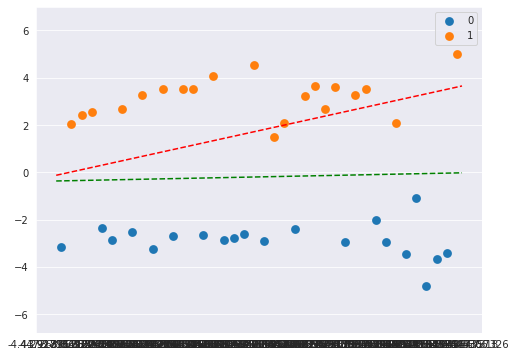

In [128]:
from sklearn.svm import LinearSVC
lr_model = LinearSVC(loss='hinge')
lr_model.fit(x,y)
w1, w2 = lr_model.coef_[0,:]
w0 = lr_model.intercept_
print(w1, w2, w0)
sns.set_style('darkgrid')
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(111)
ax1.set_ylim(ymin=np.min(x)-2, ymax=np.max(x)+2)
sns.pointplot(x.T[0,:], x.T[1,:],hue=y, join=False, ax=ax1)
x_vals = np.array(ax1.get_xlim())
y_vals = -(w0/w2) - (w1/w2) * x_vals
plt.plot(x_vals, y_vals,'--', color='r')

y_vals_cust = intercept + slope * x_vals
plt.plot(x_vals, y_vals_cust,'--', color='g')


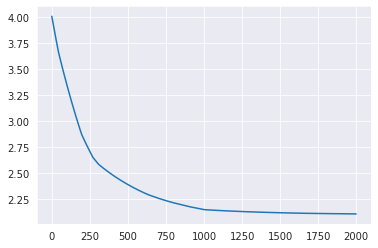

In [122]:
loss = metadata_lmc.T[0,:]
loss, weights_array, bias_array = metadata_lmc.T
epochs = list(range(len(loss)))
sns.lineplot(y=list(loss), x=epochs)
plt.show()